In [1]:
from tester_prc2 import Tester

In [2]:
tester = Tester(
    verbose=True,
    pair="BTCUSDT",
    difficulty="HIGH",
    use_fee=True,
    fee_maker=0.0004,
    fee_taker=0.0002,
    system="NETTING"
)

In [3]:
start = ["2023-10-01", "2023-10-01", "2023-08-01", "2023-12-10", "2023-11-01", "2024-01-27 23:47:00", "2022-01-01"]
end = ["2023-11-19", "2023-10-20", "2023-09-01", "2024-01-10", "2024-01-30", "2024-02-07 05:01:00", "2024-05-15"]
num = 6
tester.test_strategy(
    interval_of_candles="1h",
    start_date_utc=start[num],
    end_date_utc=end[num],
    initial_quote=1000,
    initial_leverage=5
)

Trying to load info from directory...
Data loaded.
---------------------------------------------------------------------------
Testing strategy | BTCUSDT
---------------------------------------------------------------------------
2022-01-03 17:00:00 | Buying 46.5 quote for 46484.0, leverage 5
2022-01-05 22:00:00 | Buying 130.8 quote for 43604.0, leverage 5
2022-01-06 04:00:00 | Buying 556.6 quote for 42817.4, leverage 5
2022-01-09 18:00:00 |  Selling (closing partially) 42.1 quote for 42085.0 (PnL w cl/fee: -1.1)
2022-01-12 14:00:00 |  Selling (closing partially) 131.6 quote for 43881.8 (PnL w cl/fee: 2.08)
2022-01-13 15:00:00 |  Selling (closing) 573.6 quote for 44120.2 (PnL w cl/fee: 12.1)
2022-01-17 17:00:00 | Buying 42.2 quote for 42211.7, leverage 5
2022-01-20 16:00:00 |  Selling (closing) 43.3 quote for 43275.8 (PnL w cl/fee: 1.05)
2022-01-20 17:00:00 | Selling 43.3 quote for 43257.2, leverage 5
2022-01-20 22:00:00 |  Buying (closing) 41.3 quote for 41319.7 (PnL w cl/fee: 1.92)
2

836.2408302954399

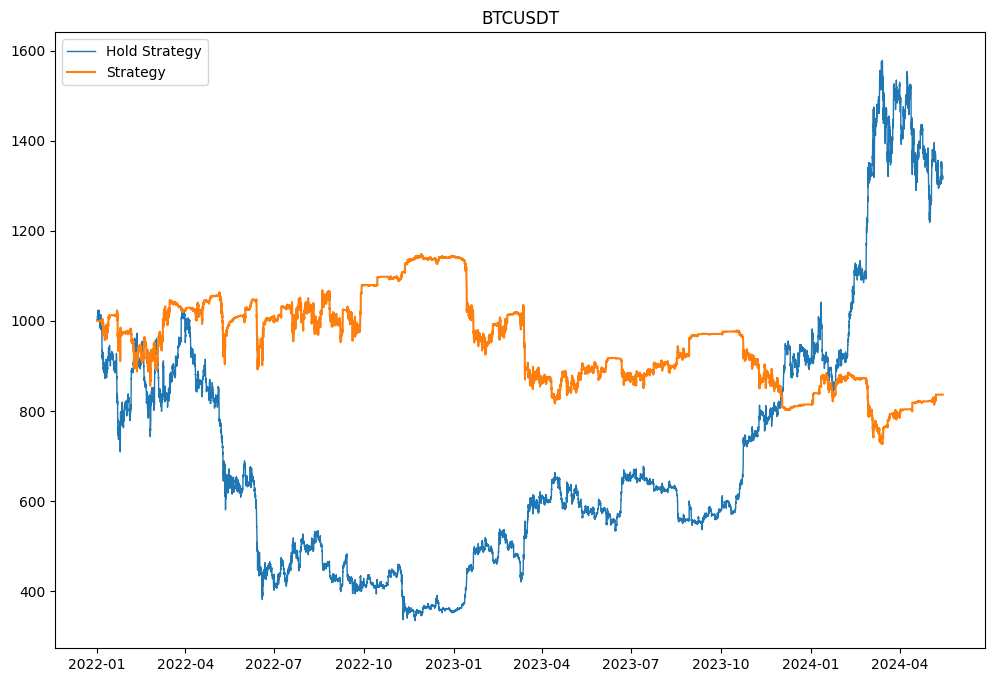

In [4]:
tester.plot_data(show_pos=False, cols=["Hold Strategy"])

In [ ]:
import pandas as pd

date = tester.data.index[150]
bar = tester.data.loc[date]
date_prev_24h = date - pd.Timedelta(hours=24)
print(date, ":::",date_prev_24h)
prev24h_bar = tester.data.loc[date_prev_24h]

chg24h = (bar["Close"] - prev24h_bar["Close"])/prev24h_bar["Close"] * 100
chg24h

In [ ]:
tester.order_manager.closed_orders[0].realized_PnL_with_fee